# Notas do curso Séries Temporais com Python

## Capítulo 5: Machine Learning em Séries Temporais

### 1. Seleção de variáveis com random forest

Uma parte importante da análise de dados é escolher corretamente o grupo de variáveis e a quantidade de dados a ser utilizada a fim de obter a melhor performance em um modelo de previsão. Nesta seção iremos abordar o uso da técnica de Random Forest com o objetivo de escolher quais são os períodos mais relevantes para melhorar a performance da previsão de períodos futuros.

In [32]:
# Biblioteca de leitura de dados
import pandas as pd

# Importando dataset (com a correta leitura da data)
ts = pd.read_csv( "../Material/Dados/AirPassengers.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)

Month
1950-01-01     3.0
1950-02-01     8.0
1950-03-01     9.0
1950-04-01     6.0
1950-05-01     4.0
1950-06-01    14.0
1950-07-01    22.0
1950-08-01    22.0
1950-09-01    22.0
1950-10-01    14.0
1950-11-01    10.0
1950-12-01    22.0
1951-01-01    30.0
Name: #Passengers, dtype: float64


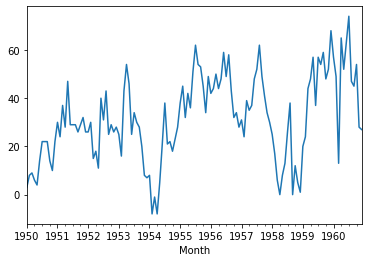

In [33]:
# Remover o efeito sazonal derivando a série temporal
dts = ts.diff(12) # NA´s entre índices 1 e 12

# Remover os 12 primeiros meses
dts = dts[12:]

# Gráfico e head da série derivada
print(dts.head(13)); dts.plot()

In [38]:
# Vamos criar uma série temporal com 12 meses para servir de base para o Random Forest
# O objetivo é fazer combinações dos períodos passados e permitir o algoritmo escolher a melhor entre elas
base = pd.DataFrame()

for i in range(12, 0, -1):
    # Algo de errado não está certo!
    base['t-'+str(i)] = dts.shift(i)
    base['t'] = dts.values

print(base.head(13))
base = base[13:] # removendo NaN's

            t-12     t  t-11  t-10  t-9  t-8   t-7   t-6   t-5   t-4   t-3  \
Month                                                                        
1950-01-01   NaN   3.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-02-01   NaN   8.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-03-01   NaN   9.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-04-01   NaN   6.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   3.0   
1950-05-01   NaN   4.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   3.0   8.0   
1950-06-01   NaN  14.0   NaN   NaN  NaN  NaN   NaN   NaN   3.0   8.0   9.0   
1950-07-01   NaN  22.0   NaN   NaN  NaN  NaN   NaN   3.0   8.0   9.0   6.0   
1950-08-01   NaN  22.0   NaN   NaN  NaN  NaN   3.0   8.0   9.0   6.0   4.0   
1950-09-01   NaN  22.0   NaN   NaN  NaN  3.0   8.0   9.0   6.0   4.0  14.0   
1950-10-01   NaN  14.0   NaN   NaN  3.0  8.0   9.0   6.0   4.0  14.0  22.0   
1950-11-01   NaN  10.0   NaN   3.0  8.0  9.0   6.0   4.0  14.0  

[0.0249511  0.37561103 0.01541998 0.0167022  0.01435688 0.02521651
 0.02093459 0.02271564 0.02462942 0.05339896 0.12840096 0.27766272]


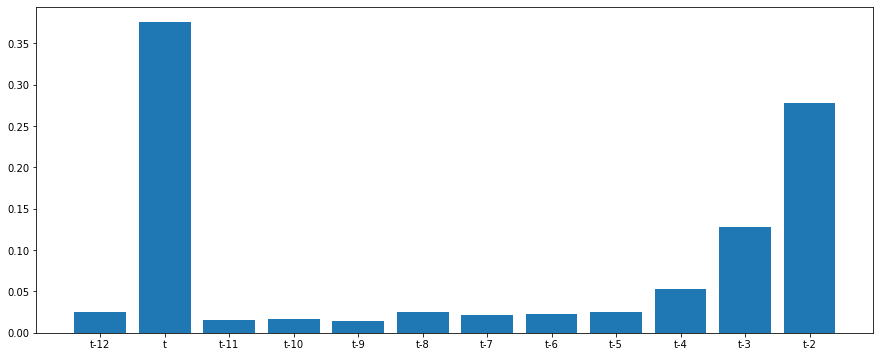

In [40]:
# Algoritmo de regressão usando random forest
from sklearn.ensemble import RandomForestRegressor

# Formatando dados para usar no regressor
array = base.values
X = array[:,0:-1]
Y = array[:,-1]

# Criando modelo
mod = RandomForestRegressor(n_estimators = 500, random_state = 1)

# Treinando modelo
mod.fit(X,Y)

# Impressão de resultados
print(mod.feature_importances_)

# Identificar qual lag apresenta maio importância (maior valor do feature_importances) ----------------------------
names  = base.columns.values[0:-1] # obtendo os nomes 't-n' das colunas
ticks = [i for i in range(len(names))] # definindo índices para cada nome

# Importando biblioteca de gráficos
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Criando gráficos de barras a partir do feature_importances_
plt.bar(ticks, mod.feature_importances_)
plt.xticks(ticks, names)
plt.show()

In [45]:
# Importando biblioteca para seleção de atributos usando RFE
from sklearn.feature_selection import RFE

# Criando regressor
rfe = RFE(RandomForestRegressor(n_estimators = 500, random_state = 1), 4)

# Treinando regressor
fit = rfe.fit(X,Y)

# Laço de impressão para observar resultados
for i in range(len(fit.support_)):
    if (fit.support_[i]):
        print(names[i])

t
t-4
t-3
t-2


A partir desses resultados (gráfico e laço de impressão) é possível observar que os períodos mais importantes para a performance da previsão são os 4 períodos anteriores

### 2. Prophet

Esse é um algoritmo de previsão de séries temporais criado pelo Facebook

In [47]:
# Importando bilioteca prophet
from fbprophet import Prophet

In [ ]:
# Importando dados
data = pd.read_csv("../Material/Dados/train_1.csv").T 
key = pd.read_csv("../Material/Dados/key_1.csv")

# Definindo parâmetros relevantes
N = 60 # Número de dias para teste
i = 1800 # Série temporal para treino

In [ ]:
# Separando dados de treino e teste
train, test = 